In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Seperating data into training and test sets(70:30)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0:].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=42)

#Standardizing Features
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
import numpy as np

cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

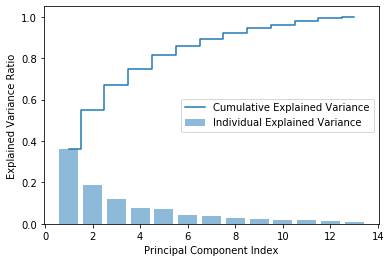

In [13]:
import matplotlib.pyplot as plt

 #Calculating the cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True) ]
cum_var_exp = np.cumsum(var_exp)

#Plotting explained variances
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.show()
    

In [15]:
#sorting the eigenpairs by decreasing order of the eigenvalues
# Making a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]


# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [18]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14733424 -0.48989241]
 [ 0.25027499 -0.23489249]
 [ 0.01252058 -0.24612128]
 [ 0.23440896  0.09586839]
 [-0.15738948 -0.27341935]
 [-0.39369045 -0.05255799]
 [-0.41565632  0.00246418]
 [ 0.27414911 -0.02048056]
 [-0.33265958 -0.01293734]
 [ 0.10517746 -0.55210635]
 [-0.29234204  0.28639953]
 [-0.38195327  0.15726874]
 [-0.28245765 -0.38127621]]


In [24]:
x_train_std[0].dot(w)
x_train_pca = x_train_std.dot(w)

In [26]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], 
                x_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

IndexError: too many indices for array